# Part I - (Loan Data from Prosper)
## by (Muhsin Hameed)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. <a href = "https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0" target =_blank> All columns description can be explored here</a>




## Preliminary Exploration and Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# read the data into the dataframe named loandata
loandata = pd.read_csv('prosperLoanData.csv')
loandata.shape

(113937, 81)

In [3]:
# a quick glance at the column headers
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# checking the top 5 records
loandata.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Not all columns are needed for this analysis. Saving below the necessary columns and discarding the rest

In [5]:
# defining a list of column headers to be retained
Columns = ['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationDate']
loandata = loandata[Columns]
loandata.info()
loandata.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingNumber                113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 12.3+ MB


,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.092,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00


### Data Wrangling

Data quality and tidiness issues are addressed below

In [6]:
# creating a copy of the dataset
loan_copy = loandata.copy()
loan_copy.head(2)

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.092,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00


In [7]:
# renaming columns
loan_copy.rename(columns = {"ListingCategory (numeric)" : "ListingCategory", "ProsperRating (Alpha)" : "ProsperRating", "IsBorrowerHomeowner" : "IsBorrowerHomeOwner"}, inplace = True)
loan_copy.head(2)

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeOwner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.092,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00


In [8]:
# remove the time portion of the timestamp as that is insignificant
loan_copy['LoanOriginationDate'] = loan_copy.LoanOriginationDate.str.replace(' 00:00:00', '', regex = False)

# comfirm the removal
loan_copy.head(2)

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeOwner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12
1,1209647,36,Current,0.12016,0.092,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03


In [9]:
# run .info to confirm the datatypes
loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingNumber          113937 non-null int64
Term                   113937 non-null int64
LoanStatus             113937 non-null object
BorrowerAPR            113912 non-null float64
BorrowerRate           113937 non-null float64
ProsperRating          84853 non-null object
ProsperScore           84853 non-null float64
ListingCategory        113937 non-null int64
BorrowerState          108422 non-null object
Occupation             110349 non-null object
EmploymentStatus       111682 non-null object
IsBorrowerHomeOwner    113937 non-null bool
IncomeRange            113937 non-null object
LoanOriginalAmount     113937 non-null int64
LoanOriginationDate    113937 non-null object
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 12.3+ MB


In [10]:
#convert LoanOriginationDate to datetime64 datatype
loan_copy['LoanOriginationDate'] = loan_copy.LoanOriginationDate.astype('datetime64')

# confirm the casting 
loan_copy.info()
loan_copy.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingNumber          113937 non-null int64
Term                   113937 non-null int64
LoanStatus             113937 non-null object
BorrowerAPR            113912 non-null float64
BorrowerRate           113937 non-null float64
ProsperRating          84853 non-null object
ProsperScore           84853 non-null float64
ListingCategory        113937 non-null int64
BorrowerState          108422 non-null object
Occupation             110349 non-null object
EmploymentStatus       111682 non-null object
IsBorrowerHomeOwner    113937 non-null bool
IncomeRange            113937 non-null object
LoanOriginalAmount     113937 non-null int64
LoanOriginationDate    113937 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 12.3+ MB


,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeOwner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.158,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12
1,1209647,36,Current,0.12016,0.092,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03


In [11]:
# Age_bins = [0,1,7,12,18,30,60,90,115]
#Age_Cat = ['infant', 'toddler', 'youngster', 'teenager', 'young_adult', 'adult','senior_citizen', 'aged']
#df['age_category'] = pd.cut(df['Age'], Age_bins, labels = Age_Cat)

# Adding a new column for the Listing Categorization
Listing_bin = [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
Listing_Cat = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby and Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'RV', 'Taxes', 'Vacation' 'Wedding Loans']
loan_copy['Listing_Category'] = pd.cut(loan_copy['ListingCategory'], Listing_bin, labels = Listing_Cat)

# verifying the categorization
loan_copy.head(5)

#dropping the numeric listingcategory
loan_copy = loan_copy.drop('ListingCategory', axis = 1)

# validating the drop
loan_copy.head(2)

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ProsperScore,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeOwner,IncomeRange,LoanOriginalAmount,LoanOriginationDate,Listing_Category
0,193129,36,Completed,0.16516,0.158,NaN,NaN,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12,NaN
1,1209647,36,Current,0.12016,0.092,A,7.0,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03,Debt Consolidation


### What is the structure of your dataset?

> The main data set contain 113937 row and 81 columns. All the columns ain't essential for this analysis, for that reason I would be working with 113937 row and 15 column. The details of the columns are below:

> <p> ✔ ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website. </p>
> <p> ✔ Term: The length of the loan expressed in months. </p>
> <p> ✔ LoanStatus: The current status of the loan: <b> Cancelled, Chargedoff, Completed, Current, Defaulted,</b> </p>
> <p> ✔ FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.</p>
> <p> ✔ BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan. </p>
> <p> ✔ BorrowerRate: The Borrower's interest rate for this loan. </p>
> <p> ✔ ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009. </p>
> <p> ✔ ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009. </p>
> <p> ✔ BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created. </p>
> <p> ✔ Occupation: The Occupation selected by the Borrower at the time they created the listing. </p>
> <p> ✔ EmploymentStatus:The employment status of the borrower at the time they posted the listing. </p>
> <p> ✔ IsBorrowerHomeOwner: A Borrower will be classified as a home-owner if they have a mortgage on their credit profile or provide documentation confirming they are a home-owner. </p>
> <p> ✔ IncomeRange: The income range of the borrower at the time the listing was created. </p>
> <p> ✔ LoanOriginalAmount: The origination amount of the loan. </p>
> <p> ✔ LoanOriginationDate: The date the loan was originated. </p>
> <p> ✔ Listing_Category: The category of the listing that the borrower selected when posting their listing </p>


### What is/are the main feature(s) of interest in your dataset?

> <p> ✔ BorrowerAPR </p>
> <p> ✔ BorrowerRate </p>
> <p> ✔ ProsperRating </p>

    
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> <p> ✔ EmploymentStatus </p>
> <p> ✔ LoanOriginalAmount </p>
> <p> ✔ IncomeRange </p>
> <p> ✔ IsBorrowerHomeOwner </p>

## Univariate Exploration



In [12]:
loan_copy.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperScore,LoanOriginalAmount
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,113937.00000
mean,6.278857e+05,40.830248,0.218828,0.192764,5.950067,8337.01385
std,3.280762e+05,10.436212,0.080364,0.074818,2.376501,6245.80058
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,1000.00000
25%,4.009190e+05,36.000000,0.156290,0.134000,4.000000,4000.00000
50%,6.005540e+05,36.000000,0.209760,0.184000,6.000000,6500.00000
75%,8.926340e+05,36.000000,0.283810,0.250000,8.000000,12000.00000
max,1.255725e+06,60.000000,0.512290,0.497500,11.000000,35000.00000


In [13]:
#Checking for null values in the 'BorrowerAPR' column

loan_copy['BorrowerAPR'].isnull().sum()

25

In [14]:
#Dropping nulls in the 'BorrowerAPR' column

loan_copy['BorrowerAPR'].dropna(axis = 0, how = "any", inplace = True)
#dropna(self, axis=0, how="any", thresh=None, subset=None, inplace=False)

loan_copy['BorrowerAPR'].isnull().sum()

0

In [15]:
# defining a function for the histogram plot for the univariate exploration

def hist_plot(df,x_value,bin):
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    plt.hist(data = df, x = x_value, bins = bin);
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))


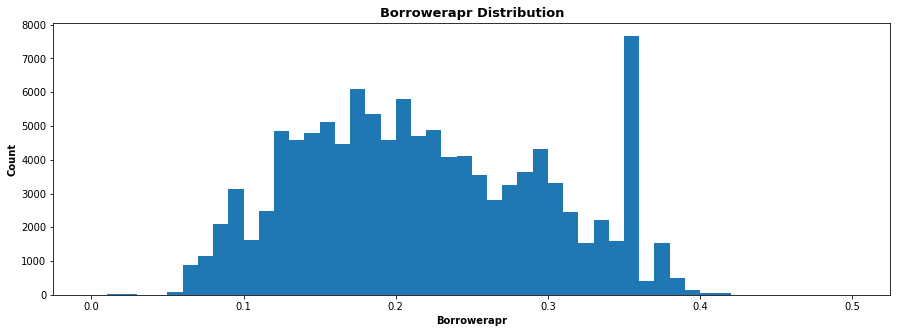

In [16]:
# plotting the borrower rate with the hist plot function

hist_plot(loan_copy,'BorrowerAPR',bin = np.arange(0, 0.5+0.01, 0.01))

The plot above shows that the 'BorrowerAPR' is a multimodal dataplot. 

The first peak was seen around 0.1, then a couple of other peaks before 0.2 and the highest went off towards 0.4 with a count of about 8000

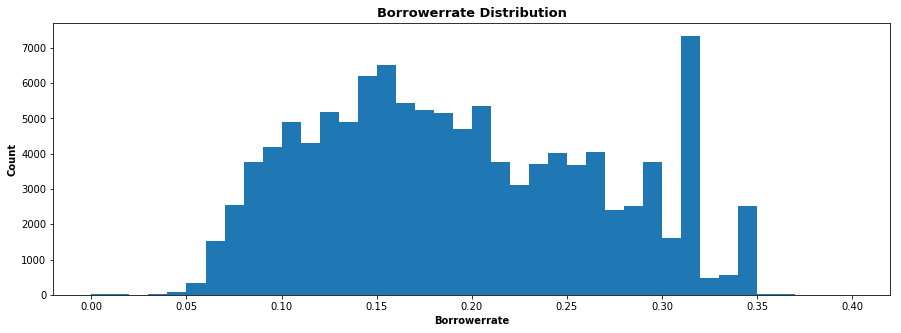

In [17]:
# using the hist plot function to plot the borrower rate distribution 
hist_plot(loan_copy,'BorrowerRate',bin = np.arange(0, 0.4+0.01, 0.01))

The plot above reveals a distribution similar to that of the BorrowerAPR. In this distribution, the peak is slightly above 0.3 with a count of approximately 7000

In [18]:
np.log10(loan_copy['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

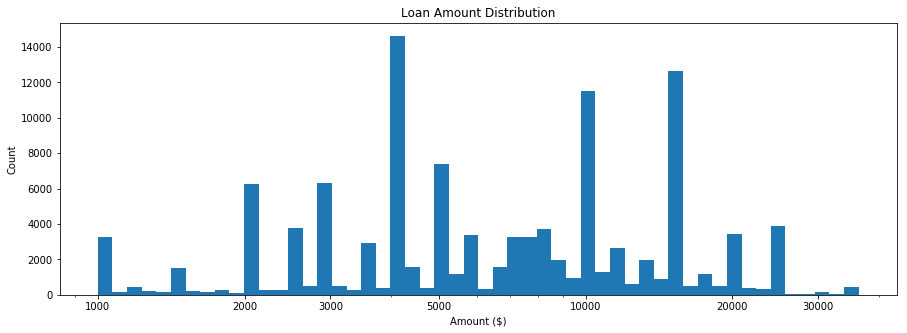

In [19]:
bins = 10 ** np.arange(3, np.log10(loan_copy['LoanOriginalAmount'].max())+0.03, 0.03)
# setting fig size
plt.figure(figsize = [15, 5])
plt.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins);
ticks = [1000,2000,3000,5000,10000,20000,30000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution')
plt.xticks(ticks, labels);

As evident in the distribution above, the loan amount is multimodal with the first mode at 1000, and the highest at about 5000. There is a seeming wide range between the amount of loan collected, apparently between 1000 and 30000 dollars

In [20]:
# creating a fuction for ploting CountPlot with x variable.
def count_xplot(df,x_value,color= sb.color_palette()[0],order=None):
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, x = x_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

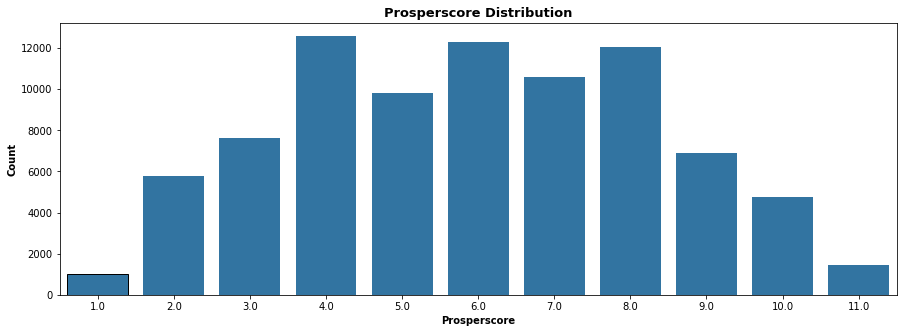

In [21]:
# using the CountPlot function on the ProsperScore variable 
count_xplot(loan_copy,'ProsperScore')

The prosper Score distrbution showed that it is multimodal, with score 4 having the highest count of about 1200, followed by 6 and 8. the lowest count score is 1. This indicates that more individuals got a good prosper score rating.

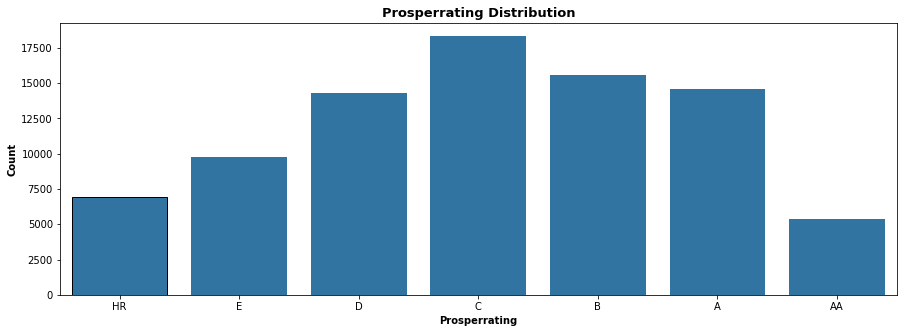

In [22]:
# seting the rating prosper rating order
rating=['HR','E','D','C','B','A','AA']
# ordering it into a categorical type data
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# setting it into the prosper rating
loan_copy['ProsperRating'] = loan_copy['ProsperRating'].astype(rate_set);


# ploting a distribution count plot for it
count_xplot(loan_copy,'ProsperRating')

The prosper rating went on the increase from HR with a count that is slightly below 7500 towards C, which is the peak of the distribution with about 17500 counts. Just after C, and towards B, it began to dip until it got to AA.


In [23]:
# creating a fuction for ploting CountPlot with y variable.
def count_yplot(df,y_value,color= sb.color_palette()[0],order=None):

    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, y = y_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{y_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.xlabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.ylabel(y_value.title(),fontsize=10,weight=("bold"))

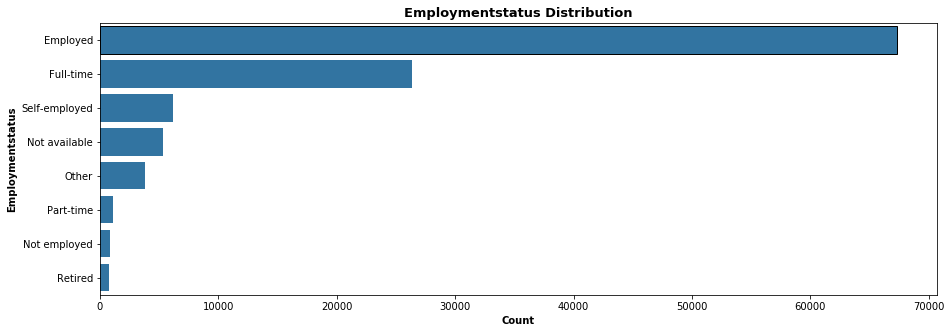

In [24]:
# ordering the EmploymentStatus variable
orders = loan_copy.EmploymentStatus.value_counts().index

# using the y function to plot the distribution
count_yplot(loan_copy,'EmploymentStatus',order=orders)

From the chart above, it is clear that the most persons that applied for loans are employed with approximately 70000 persons, while the least applicants were retired

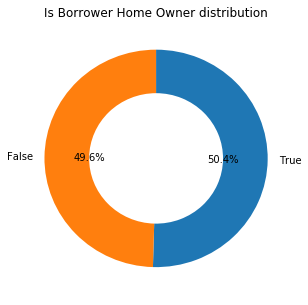

In [25]:
# plotting a doughnut chart for the HomeOwner distribution

counts = loan_copy.IsBorrowerHomeOwner.value_counts()

# setting the fig size for ploting
plt.figure(figsize = [5, 5])
plt.pie(counts, labels = counts.index,autopct='%1.1f%%', startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("Is Borrower Home Owner distribution");

The plot above shows an almost evenly distributed count between borrowers who have a home and those who do not. By implication, this might not count so much in getting a loan or not with the observed closeness


In [26]:
# slice down to the top 20 occupations of the borrowers
loan_copy.Occupation.value_counts()[:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

Many loan takers didnt fill in their occupations, for this reason, it may be difficult to ascertain which of the professions receive loans the most

In [27]:
loan_copy['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

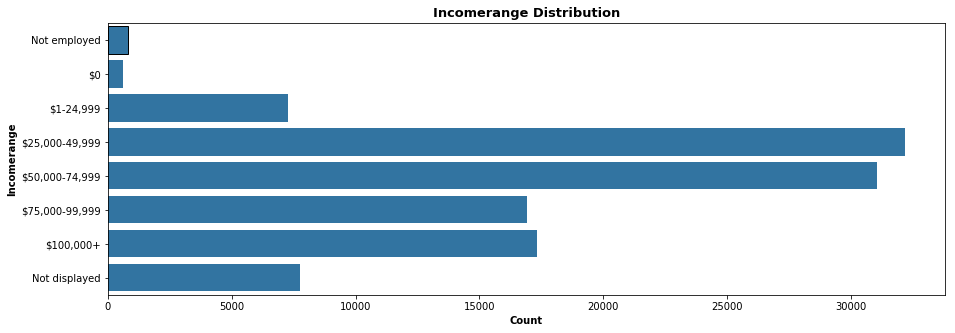

In [28]:
# Ordering the plot for the IncomeRange variable
income_orders=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']

# using the function count_yplot for ploting
count_yplot(loan_copy, 'IncomeRange', order=income_orders)

Most of the borrowers have their income between 25,000 and 49,999

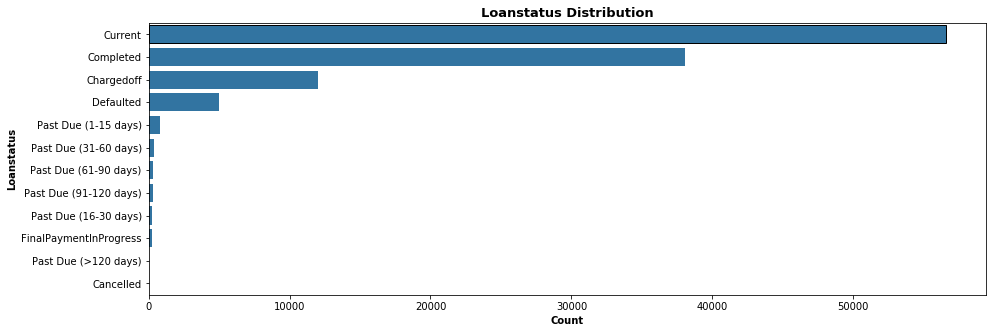

In [29]:
# Ordering the plot for the LoanStatus variable 
orders = loan_copy.LoanStatus.value_counts().index

# using count plot for the Loan status distribution
count_yplot(loan_copy,'LoanStatus',order=orders)

Most Borrowers have either completed repayment of their loans or still within the loan term/period

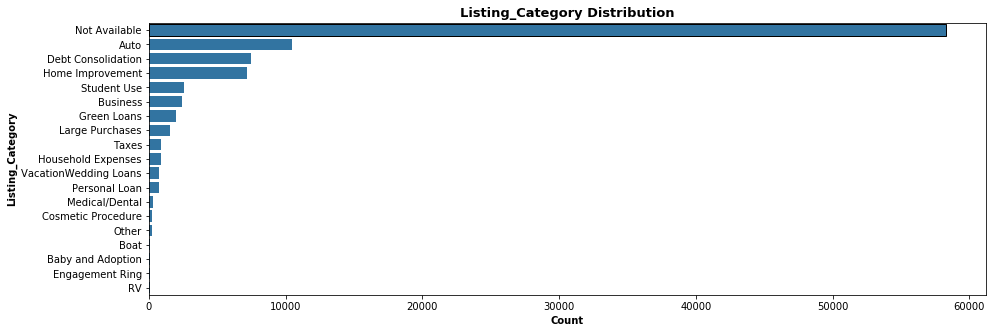

In [30]:
# Ordering the plot for the ListingCategory variable
orders = loan_copy.Listing_Category.value_counts()[:20].index

orders

#plotting for the reason for getting loans
count_yplot(loan_copy, 'Listing_Category', order=orders)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerAPR was found to be multimodal with an unexpected spike around about 0.4 percent,  Also, i found out that the BorrowerIntrest had a similar trend with the BorrowerAPR, which I think is normal because the interest rate plus other expense fees like mortgage would typically make up the BorrowerAPR. Hence, the reason for the correlation observed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the most part of the distribution, the plots were normal. I also converted the Listing Category from numeric to a categorical variable for a better representation and more apt plotting

## Bivariate Exploration


### What is the average borrower APR distribution by year ?

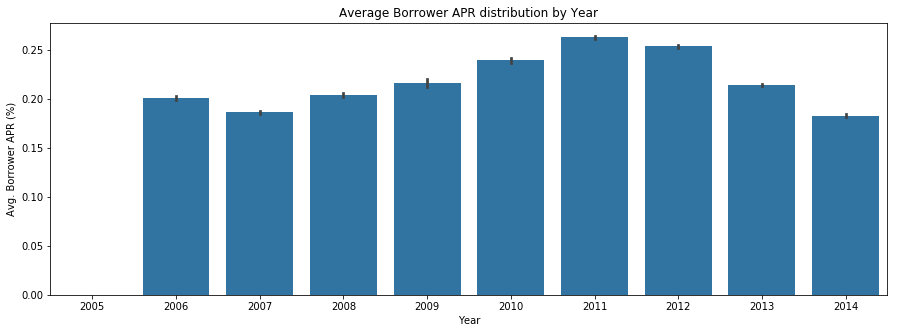

In [34]:
# Extracting year from the LoanOriginalDate column and adding it into a new column 'Year'
loan_copy['Year'] = loan_copy['LoanOriginationDate'].dt.year
plt.figure(figsize = [15, 5])
colour= sb.color_palette()[0]

# plotting a bar chart to show the average borrower Apr distribution by year.
sb.barplot(data = loan_copy, x='Year', y='BorrowerAPR', color=colour);
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Year');

This distribution shows that 2006 had 0.2% with a slight fall down to 2007 and then an observable increase up until 2011 which was the highest with APR % rate of about 0.25%. A steady decrease was then observed from 2012 to 2014.

In [35]:
#  Extracting month from the LoanOriginalDate column and adding it into a new column 'Month'
loan_copy['Month']= loan_copy['LoanOriginationDate'].dt.strftime('%b')
# setting order categories by month
Month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# ordering it into a categorical type data
set_m = pd.api.types.CategoricalDtype(ordered=True, categories=Month)
# setting it into the prosper rating
loan_copy['Month'] = loan_copy['Month'].astype(set_m)


### BorrowerAPR distribution by Month

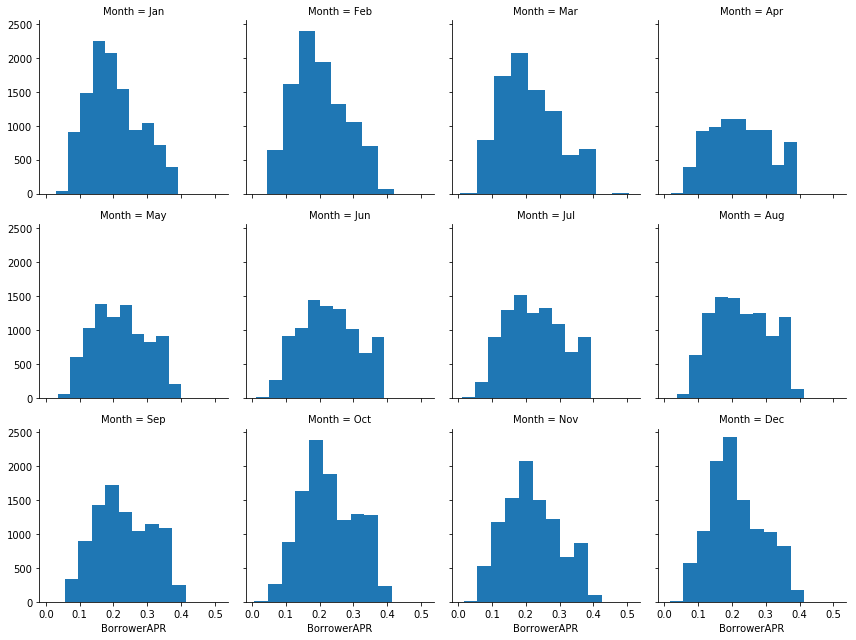

In [36]:
m=sb.FacetGrid(data=loan_copy,col_wrap=4, col='Month');
m.map(plt.hist,'BorrowerAPR');

The distribution shows that months like January, February, March, October, November, and December had higher peak periods than other months.

### Do Prosper Rating and Prosper Score affect Borrower APR ?

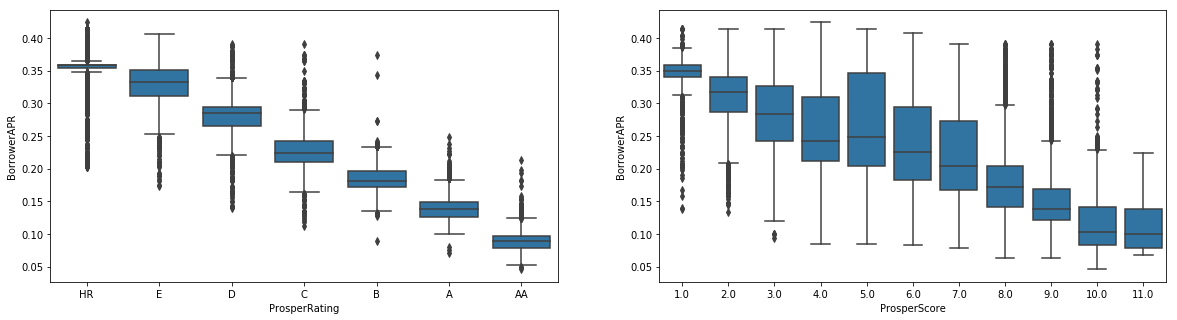

In [37]:
# ploting fig size
plt.figure(figsize=[20,5])
# stating the position of the plot
plt.subplot(1,2,1)
# setting a box plot to show the distribution 
sb.boxplot(data=loan_copy, x='ProsperRating', y='BorrowerAPR', color=colour);
# stating the position of the second plot
plt.subplot(1,2,2)
#setting a box plot for the Scores distribution
sb.boxplot(data=loan_copy, x='ProsperScore', y='BorrowerAPR', color=colour);

The observation from the plots shows that the higher the ratings, the lower the borrower APR. That means to have a good rating, ones APR must be below 0.1%

### What are the correlations between BorrowerAPR','BorrowerRate','LoanOriginalAmount, and Prosper Score

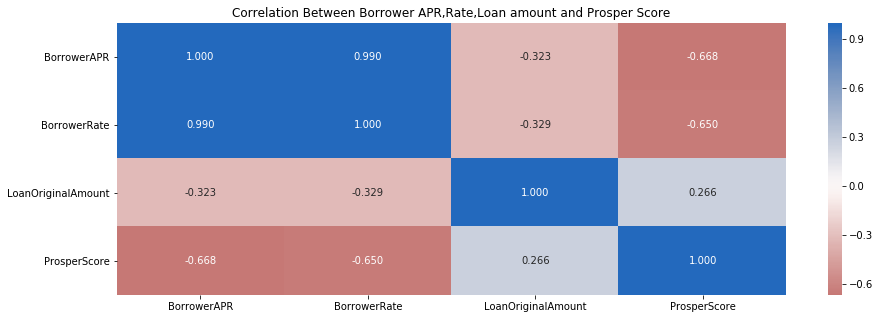

In [38]:
# creating a list for the columns
num_var=['BorrowerAPR','BorrowerRate','LoanOriginalAmount','ProsperScore']
# correlation plot
plt.figure(figsize = [15, 5])
sb.heatmap(loan_copy[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Between Borrower APR,Rate,Loan amount and Prosper Score');

The correlation coefficient indicate that the borrower rate and APR have positive correlation meaning that the rise in one value leads to an approximate increase in the other

However, the Prosper Score shows a moderatly strong negative relationship with Borrower APR and Borrower rate

### Do Loan amount affect Borrowers API


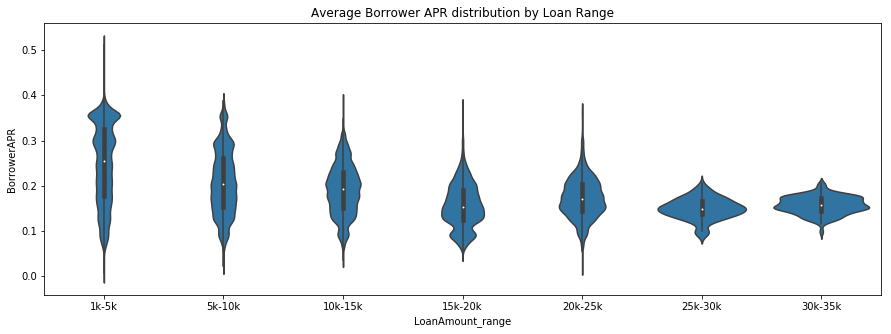

In [39]:
# using the .cut function to create a new column for loan amount range
loan_copy['LoanAmount_range']=pd.cut(loan_copy.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 5])
# plotting the violinplot
sb.violinplot(data=loan_copy, x='LoanAmount_range', y='BorrowerAPR', color=colour);
plt.title('Average Borrower APR distribution by Loan Range');

the higher range the lower the mean borrower rate.

### What is the relationship Between Income Range and HomeOwner

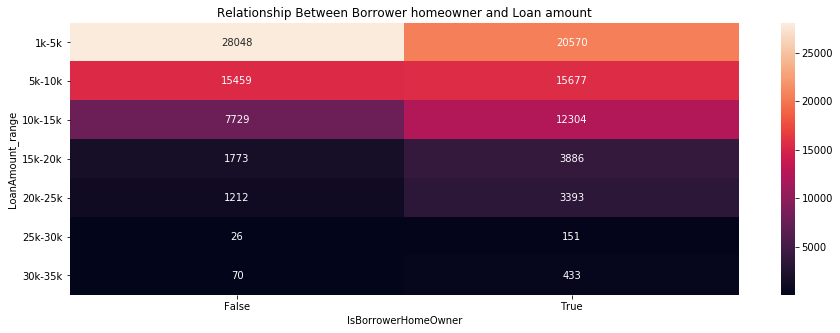

In [40]:
# first i use the group by statement to group the varaibles
group=loan_copy.groupby(['LoanAmount_range','IsBorrowerHomeOwner']).size()
# used the .index to set it into a data frame
group=group.reset_index(name='count')
# pivoted the data set
plt.figure(figsize = [15, 5])
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeOwner', values = 'count')
# draw a heat map for the distribution
sb.heatmap(group,annot = True, fmt = 'd');
plt.title('Relationship Between Borrower homeowner and Loan amount');

The distribution reveals that most loan collected were less than or equal to 10k

For LoanAmount of about 15k, the collectors were mostly HomeOwners

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The distribution shows that the mean values of APR were within the 0.2 range, with 2011 being the year with the highest APR rate. Also, it was observed that the month with lower API shows a high borrower count and vice versa. However, there was not much correlation with the loan amount, and the majority of the homeowners dominated the amount range distribution.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The majority of the loans were collected for 3 years and above. With a gradual increase in loan amount being collected, the borrower count decreased. However, the borrowers who had homes dominated the higher amount of loan collected than those who did not.

## Multivariate Exploration


### How does the Borrower APR affect the loan and Homeownership

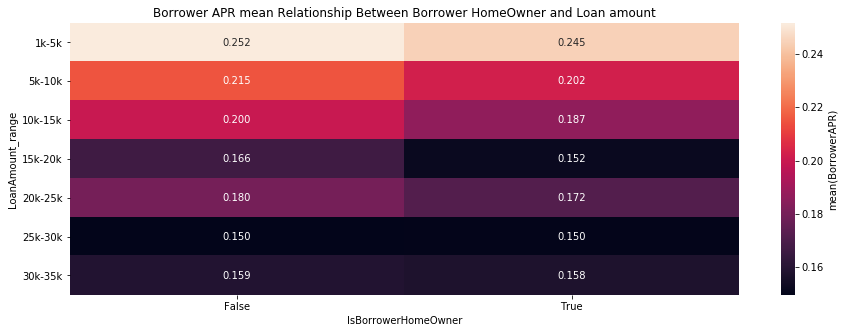

In [41]:
# adding the borrower APR to the chat
group=loan_copy.groupby(['LoanAmount_range','IsBorrowerHomeOwner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeOwner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [15, 5]);
sb.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR mean Relationship Between Borrower HomeOwner and Loan amount');

The borrowers APR had no effect on the home owner relationship. Although, the loan amount had an inverse relationship with borrower APR.


### Does the term have a significance effect on the loan and APR

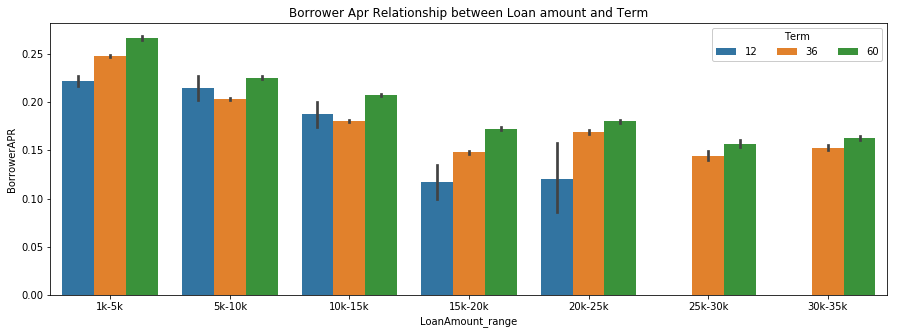

In [42]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5])
yx=sb.barplot(data=loan_copy,x='LoanAmount_range',y='BorrowerAPR',hue='Term');
yx.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term");

The trend shows that the longer term(5 years) had higher borrower APR. which means the longer the term the individual collect the loan the higher their APR gets.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The first multivariate visual showed that the higher the APR, the lower the loan collected and the homeowner had no effect noticeably on the loan amount range. However, when the terms were considered, it became evident that the longer the loan term, the higher the APR becomes.

### Were there any interesting or surprising interactions between features?

> The loan term had a significant effect on how high the borrower's APR gets. Also, the lower the borrower APR, the higher the ratings.

## Conclusions
>Conclusively, the borrower APR had the same trend as the Borrowers rate. it could be inferred that the higher the ratings, the lower the borrower's APR, and collecting loans for a longer period will increase their borrower's APR. It was observed that most loans were collected for 3 years and the borrowers APR mean were mostly within 0.2%. In addition, majority of loan takers were homeowners. The Borrower's APR appeared to be significant in the decision of who to give out loans to